## Predicting insurance charges and loan application outcomes using Linear Models for Regression and Classification and Support Vector Machines


The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [16]:
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [224]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score


## **Part 1: Data Visualization and Analysis**

Understanding data characteristics and patterns is crucial for building effective models. In this part, we will visualize and analyze the `insurance.csv` dataset.

<b>Note: Remember to label plot axes while plotting.</b>

In [25]:
#Loading the dataset
insurance_df = pd.read_csv('insurance.csv')
insurance_df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**1.1 Create a bar chart to compare the average insurance charges by sex and region.**


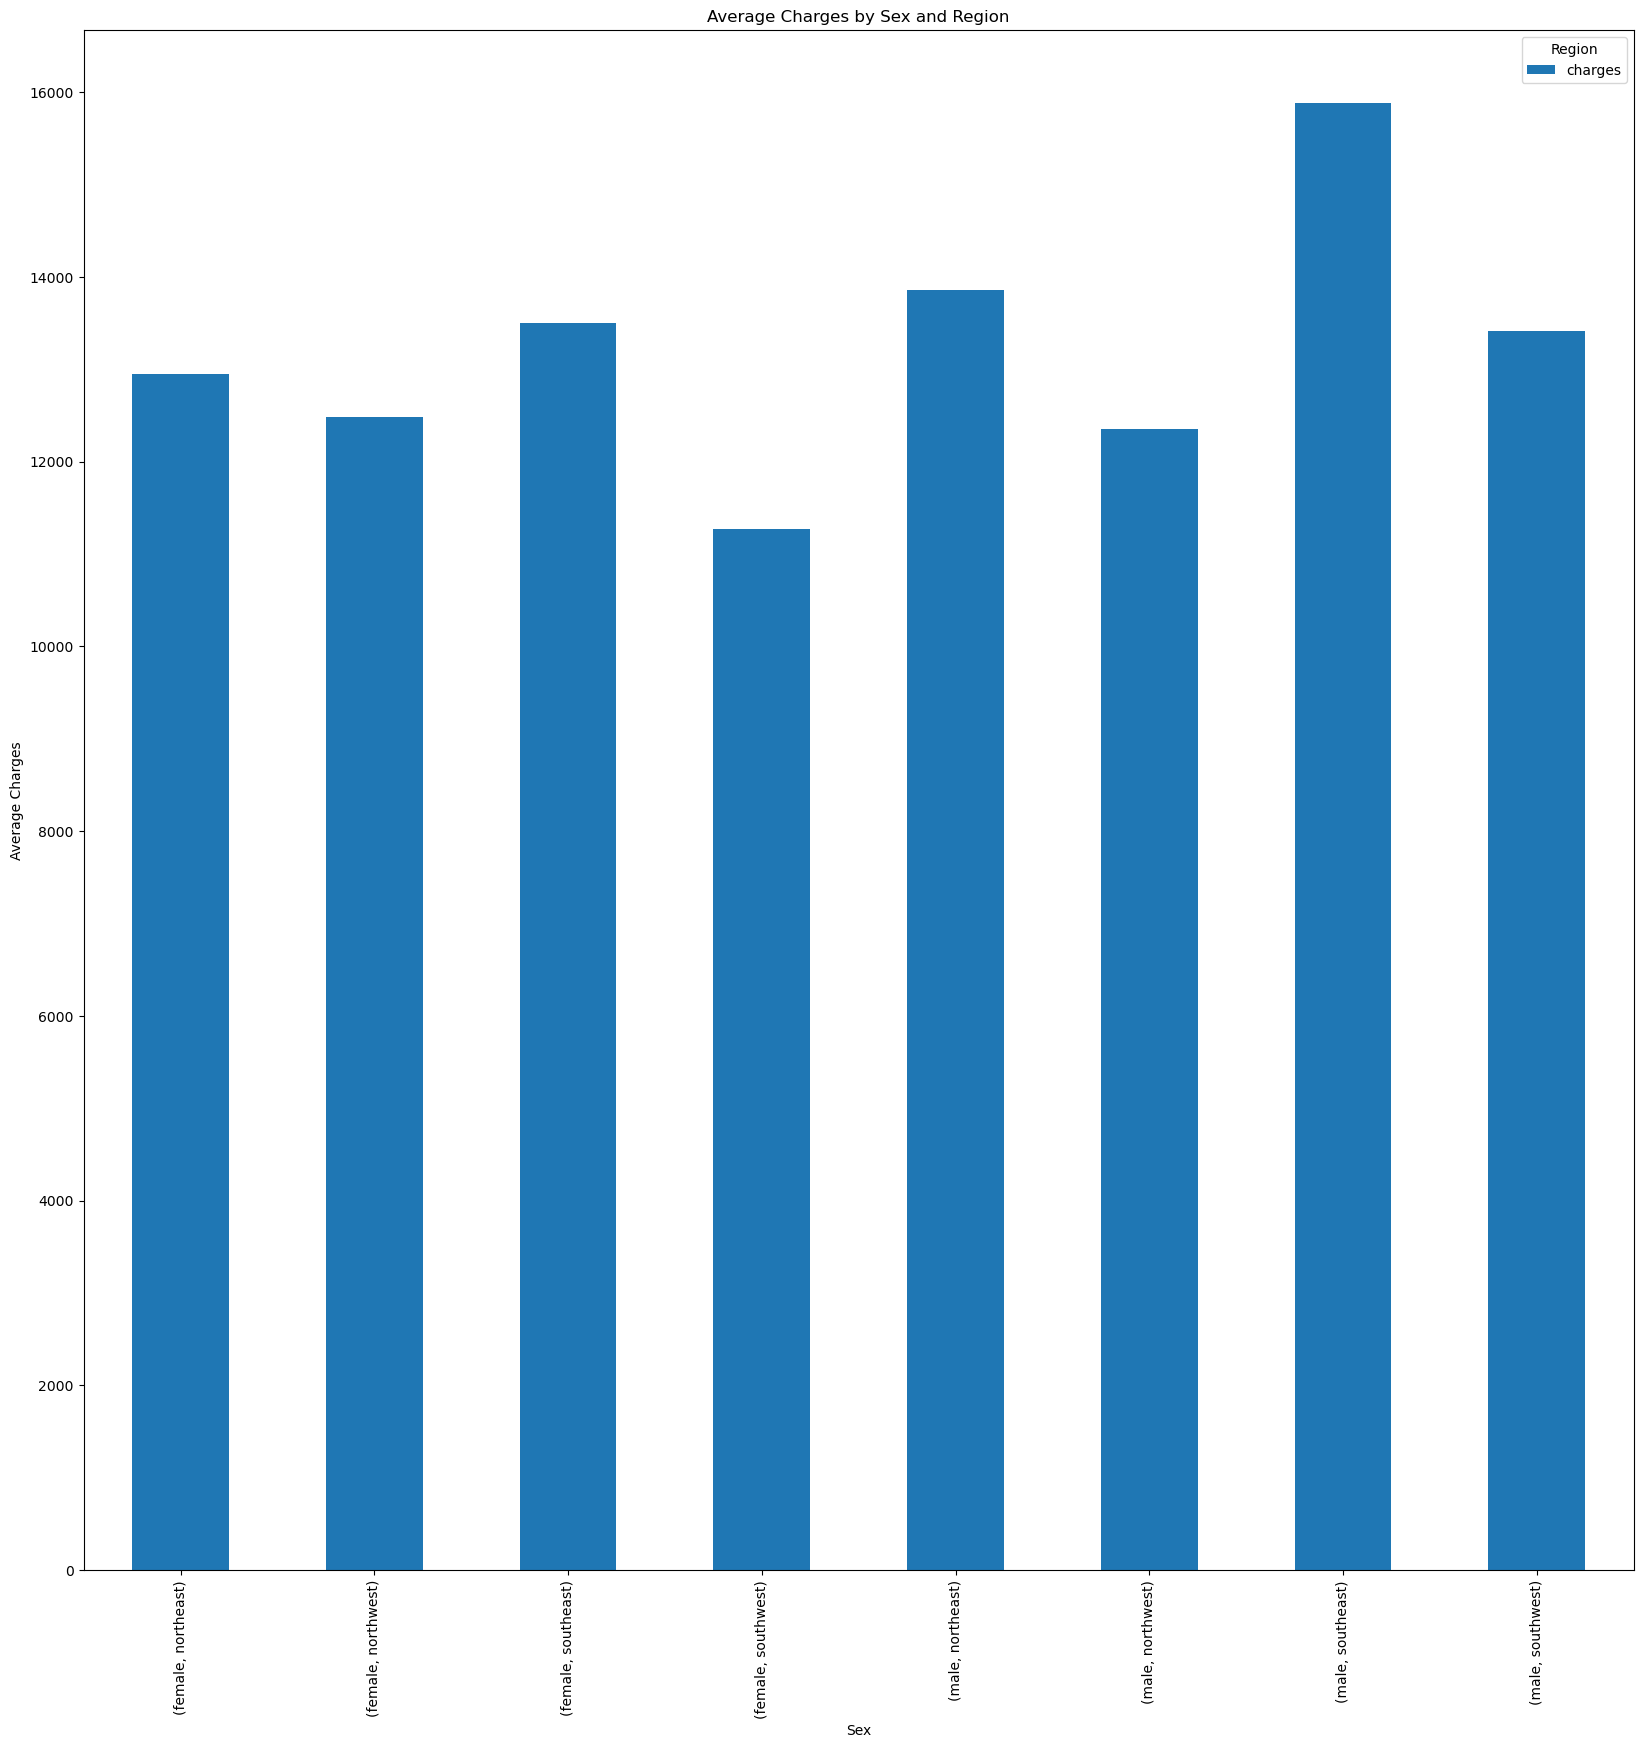

In [28]:

average_charges = insurance_df.groupby(['sex', 'region'])['charges'].mean()
average_charges.plot(kind='bar', figsize=(20,20))

plt.xlabel('Sex')
plt.ylabel('Average Charges')
plt.title('Average Charges by Sex and Region')
plt.legend(title='Region')
plt.show()

Sex and regions have been grouped together (each group represented by a bar), and calculated the average charge for each one.

**1.2 Plot a small multiple of bar charts to visualize the data distribution for the following categorical variables:**
1. **sex**
2. **region**
3. **children**
4. **smoker**

**Make subplots in the same graph**

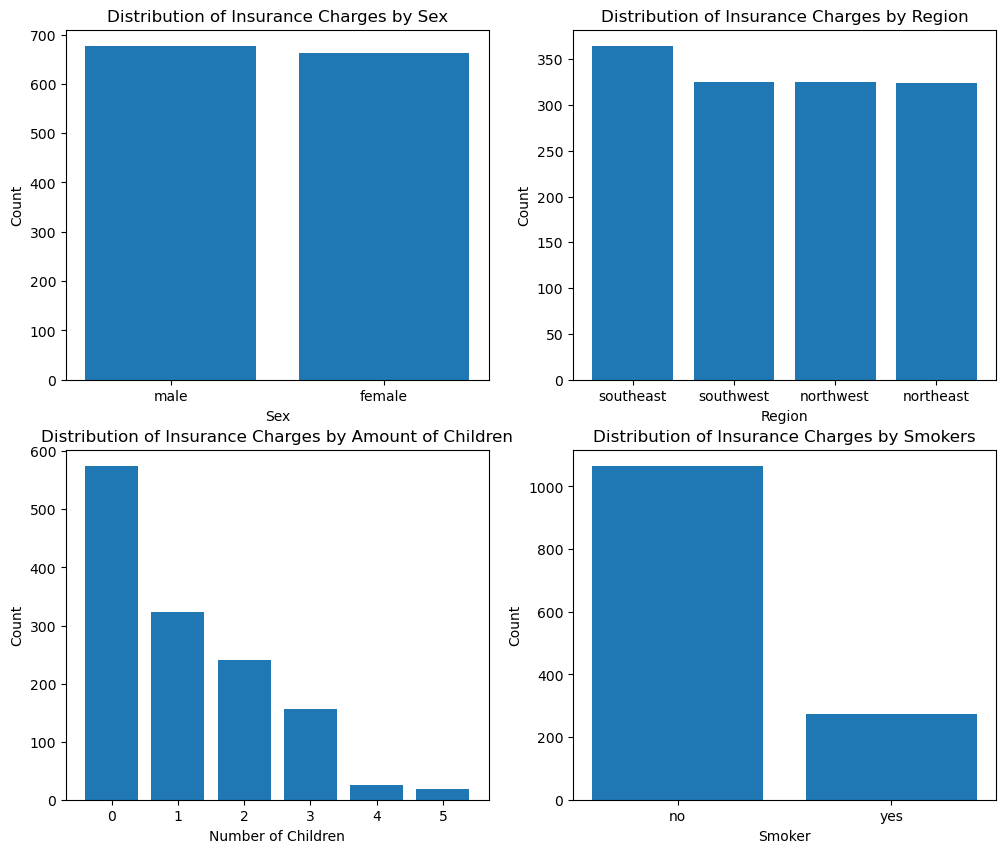

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sex_counts = insurance_df['sex'].value_counts()
axes[0, 0].bar(sex_counts.index, sex_counts.values)
axes[0, 0].set_title('Distribution of Insurance Charges by Sex')
axes[0, 0].set_xlabel('Sex')
axes[0, 0].set_ylabel('Count')

region_counts = insurance_df['region'].value_counts()
axes[0, 1].bar(region_counts.index, region_counts.values)
axes[0, 1].set_title('Distribution of Insurance Charges by Region')
axes[0, 1].set_xlabel('Region')
axes[0, 1].set_ylabel('Count')

children_counts = insurance_df['children'].value_counts()
axes[1, 0].bar(children_counts.index.astype(str), children_counts.values)
axes[1, 0].set_title('Distribution of Insurance Charges by Amount of Children')
axes[1, 0].set_xlabel('Number of Children')
axes[1, 0].set_ylabel('Count')

smoker_counts = insurance_df['smoker'].value_counts()
axes[1, 1].bar(smoker_counts.index, smoker_counts.values)
axes[1, 1].set_title('Distribution of Insurance Charges by Smokers')
axes[1, 1].set_xlabel('Smoker')
axes[1, 1].set_ylabel('Count')

plt.show()

In [48]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Plotting the amount of insurance charges by each feature individually reveals certain preliminary patterns in the dataset. For example, the amount of charges incurred by individuals who smoke are significantly higher than those who do not. 

**1.3 Compare the insurance charges by age and smoker. Create a Scatter plot for age vs insurance charges categorize them by smoker type.**

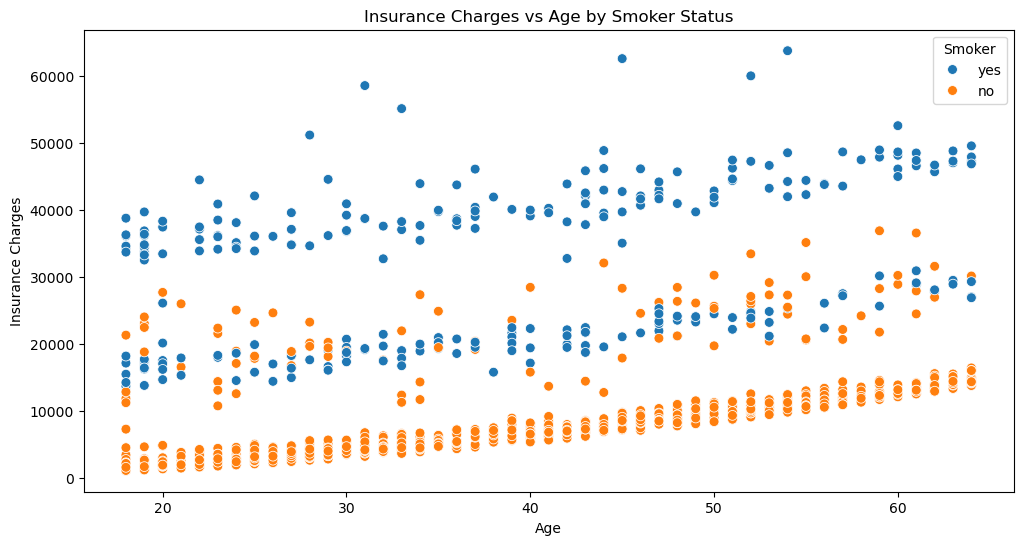

In [52]:
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(data=insurance_df, x='age', y='charges', hue='smoker',s=50)

plt.title('Insurance Charges vs Age by Smoker Status')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.legend(title='Smoker')

plt.show()

## **Part 2: Linear Models for Regression and Classification**
In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**.

### **2.1 Linear Regression**
We will now proceed with splitting the dataset and implementing linear regression to predict `insurance charges`.

In [54]:
insurance_X = insurance_df.drop(columns=['charges'])
insurance_Y = insurance_df['charges']

**2.1.1 Plot relationships between features (age, bmi, children, region) and the target variable `charges` as a small multiple of scatter plots.**
1. age
2. bmi
3. children
4. region

Make sure to label the axes.
<b></b>

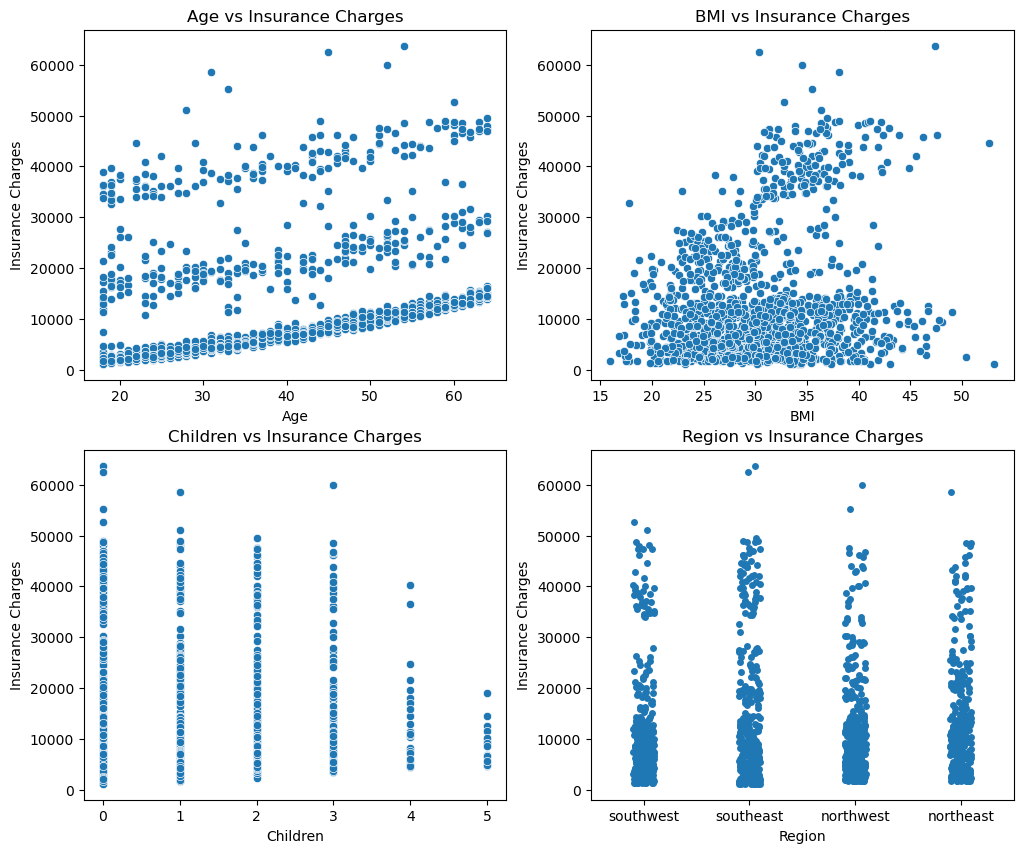

In [57]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(x='age', y='charges', data=insurance_df, ax=axes[0, 0])
axes[0, 0].set_title('Age vs Insurance Charges')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Insurance Charges')

sns.scatterplot(x='bmi', y='charges', data=insurance_df, ax=axes[0, 1])
axes[0, 1].set_title('BMI vs Insurance Charges')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Insurance Charges')

sns.scatterplot(x='children', y='charges', data=insurance_df, ax=axes[1, 0])
axes[1, 0].set_title('Children vs Insurance Charges')
axes[1, 0].set_xlabel('Children')
axes[1, 0].set_ylabel('Insurance Charges')

sns.stripplot(x='region', y='charges', data=insurance_df, ax=axes[1, 1], jitter=True)
axes[1, 1].set_title('Region vs Insurance Charges')
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('Insurance Charges')

plt.show()


**2.1.2 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**



The graphs reveal that the relationships between insurance charges and categories like age, BMI, and number of children are not strictly linear. Age likely has a linear relationship with insurance charges. Older individuals may have higher charges due to increased health risks. There are three distinct pattern that steadily increase with older indivisuals. These likely correspond to other factors increasing the baseline charges for each individual (eg smoking, pre-existing health conditions)
BMI has a less clear relationship with insurance charges than age. There is a cluster of datapoints for low BMI values concentrated in the lower range. For BMI's above 30 there is high variability, suggesting that there is no strictly linear relationship. 


The regional differences and number of children, being categorical data, lack a clear overall pattern. As the number of children increase the charges are less variable and focus more on lower charges, but this in itself does not suggest a linear relationship. Similarly, the data plotted by region is distributed similarly across all regions. The non-linear relationships suggest that linear regression might not be the most appropriate model for this data. But does give us some insight on the data which can then be used for more complex models.

### **Data Preprocessing**

Before we can fit a linear regression model, several pre-processing steps should be applied to the dataset:

1. **Encode categorical features appropriately** (e.g., `sex`, `smoker`, `region`).
2. **Check for multicollinearity** by analyzing the correlation matrix and removing any highly collinear features.
3. **Split the dataset** into training (60%), validation (20%), and test (20%) sets.
4. **Standardize the feature matrices** (`X_train`, `X_val`, and `X_test`) to have zero mean and unit variance. Ensure that the standardization parameters (mean, variance) are learned from `X_train` and then applied to all sets to avoid information leakage.
5. **Add a column of ones** to `X_train`, `X_val`, and `X_test` for learning the bias term in the linear model.


**2.1.3 Encode the categorical variables of the Insurance dataset.**

In [91]:
insurance_df_encoded = pd.get_dummies(insurance_df, columns=['sex', 'smoker', 'region'], drop_first=True)
correlation_matrix = insurance_df_encoded.corr()

**2.1.4 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >= 0.8). If yes, drop one from each pair of highly correlated features from the dataframe. It is fine if you do not find any highly correlated features. Why could this be necessary before proceeding further?**

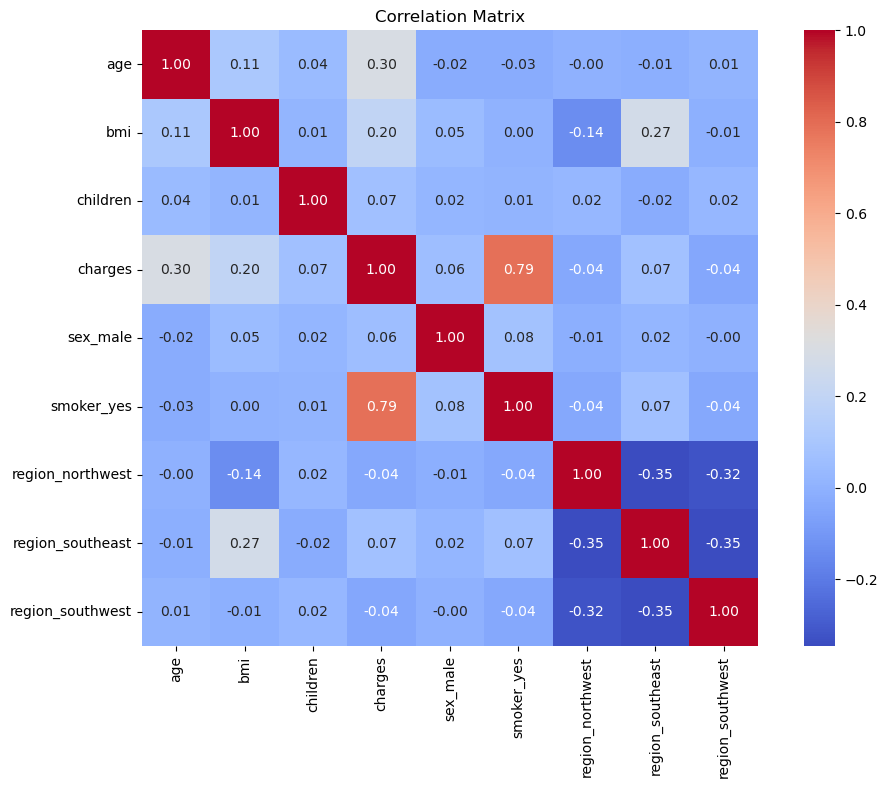

In [94]:

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

#Setting threshold value
threshold = 0.8
high_corr_pairs = []

#Finding high correlation pairs 
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            colname = correlation_matrix.columns[i]
            high_corr_pairs.append((colname, correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

#Dropping first element of high correlation pair
if high_corr_pairs:
    features_to_drop = set()
    for pair in high_corr_pairs:
        features_to_drop.add(pair[0])

    #Dropping features from df
    insurance_df_encoded = insurance_df_encoded.drop(columns=features_to_drop)

Removing any high correlation values may help later when building our model. It can help it estimate the relationship between our variables X and Y more accurately. 

**2.1.5 Split the dataset into training (60%), validation (20%), and test (20%) sets.**

In [100]:
X = insurance_df_encoded.drop(columns=['charges'])  
y = insurance_df_encoded['charges'] 

X_train, temp_X, insurance_y_train, temp_y = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, insurance_y_val, insurance_y_test = train_test_split(temp_X, temp_y, test_size=0.5, random_state=42)


**2.1.6 Standardize the columns in the feature matrices.**

In [103]:

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) 
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test) 

In [105]:

insurance_X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
insurance_X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
insurance_X_test = np.hstack([np.ones((X_train.shape[0], 1)), X_train])


At the end of this pre-processing, you should have the following vectors and matrices:

- **insurance_X_train**: Training set feature matrix.
- **insurance_X_val**: Validation set feature matrix.
- **insurance_X_test**: Test set feature matrix.
- **insurance_y_train**: Training set labels (insurance charges).
- **insurance_y_val**: Validation set labels.
- **insurance_y_test**: Test set labels.


### Implement Linear Regression

Now that the data is preprocessed, we can implement a linear regression model, specifically Ridge Regression, which incorporates L2 regularization.

Given a feature matrix \( X \), a label vector \( y \), and a weight vector \( w \), the hypothesis function for linear regression is:

$$
y = X w
$$

The objective is to find the optimal weight vector \( w \) that minimizes the following loss function:



$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

Where:
-  $\| X w - y \|^2_2$ penalizes predictions that differ from actual labels.
- $\alpha \| w \|^2_2$ is the regularization term, helping reduce overfitting by penalizing large weights.
-  $\alpha$ is the regularization parameter.

The closed-form solution for Ridge Regression is given by the Normal Equations:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$





**2.1.7 Implement a `LinearRegression` class with `train` and `predict` methods**

We will now implement a custom `LinearRegression` class with L2 regularization (Ridge Regression).

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [126]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    
    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution.
        Parameters:
        X : (m x n) feature matrix
        y: (m x 1) label vector
        '''
        A = X.T @ X 
        A = A + self.alpha*np.identity(X.shape[1])
        B = X.T @ y
        self.w = np.linalg.solve(A,B)


    def predict(self, X):
        '''Predicts on X using trained model.
        Parameters:
        X : (m x n) feature matrix
        Returns:
        y_pred: (m x 1) prediction vector
        '''
        y_pred=X@self.w
        return y_pred

**2.1.8 Train, Evaluate, and Interpret Linear Regression Model**

**Train a linear regression model ($\alpha = 0$) on the insurance dataset. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**


In [130]:
def get_report(y_pred, y_test):
    """
    Report the first 3 and last 3 predictions on X_test,
    along with the actual labels in y_test.

    Returns:
        A dataframe with 6 rows comparing predictions and actuals.
    """
    preds = np.concatenate([y_pred[:3], y_pred[-3:]])
    actuals = np.concatenate([y_test[:3], y_test[-3:]])
    df_compare = pd.DataFrame({'Prediction': preds,
                               'Actual': actuals})
    df_compare['Position'] = [1, 2, 3, len(y_pred) - 2, len(y_pred) - 1, len(y_pred)]
    df_compare = df_compare.set_index('Position')
    return df_compare

In [144]:
lin_reg_model = LinearRegression(alpha=0)
lin_reg_model.train(insurance_X_train, insurance_y_train.values)

# Predictions
y_train_pred = lin_reg_model.predict(insurance_X_train)
y_val_pred = lin_reg_model.predict(insurance_X_val)
y_test_pred = lin_reg_model.predict(insurance_X_test)


**2.1.9 Use the mean of the training labels (insurance_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.**

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [146]:
r2_train = r2_score(insurance_y_train, y_train_pred)
r2_val = r2_score(insurance_y_val, y_val_pred)
r2_test = r2_score(insurance_y_test, y_test_pred)

print("R² on Training Set:", r2_train)
print("R² on Validation Set:", r2_val)
print("R² on Test Set:", r2_test)

report_df = get_report(y_test_pred, insurance_y_test.values)
print(report_df)


R² on Training Set: 0.7422834324413088
R² on Validation Set: 0.7620093485062263
R² on Test Set: 0.7584536162870946
            Prediction       Actual
Position                           
1         31420.384684  22478.60000
2          9022.472491   5836.52040
3         11754.829781   6373.55735
266       12825.269068  10564.88450
267       10289.283270   2927.06470
268       13409.956235   9877.60770


**2.1.10 Interpret your model trained on the insurance dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

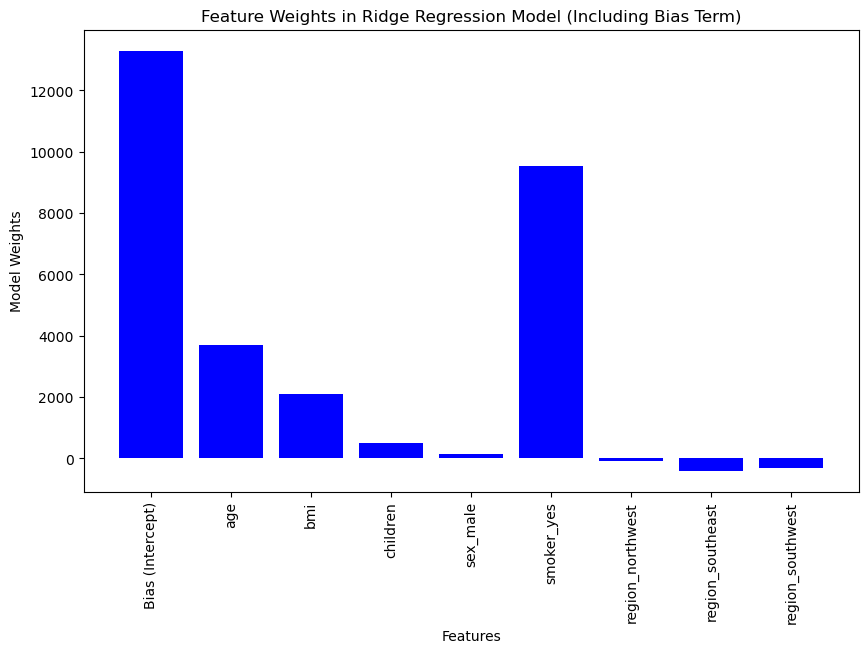

In [150]:
weights = lin_reg_model.w
feature_names = X.columns.tolist()  

feature_names = ['Bias (Intercept)'] + feature_names
plt.figure(figsize=(10, 6))
plt.bar(feature_names, weights, color='blue')
plt.xticks(rotation=90)  
plt.xlabel('Features')
plt.ylabel('Model Weights')
plt.title('Feature Weights in Ridge Regression Model (Including Bias Term)')

plt.show()

**2.1.11 According to your model, which features are the greatest contributors to insurance charges?**

The greatest contributors to insurance charges are smoking, age and bmi.

### **Hyperparameter Tuning ($\alpha$)**

Now, let's tune the $\alpha$ regularization parameter for ridge regression on the insurance dataset.

**2.1.12 Sweep out values for $\alpha$ using `alphas = np.logspace(-5, 1, 20)`. Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. Plot the results with a log scale for $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.****

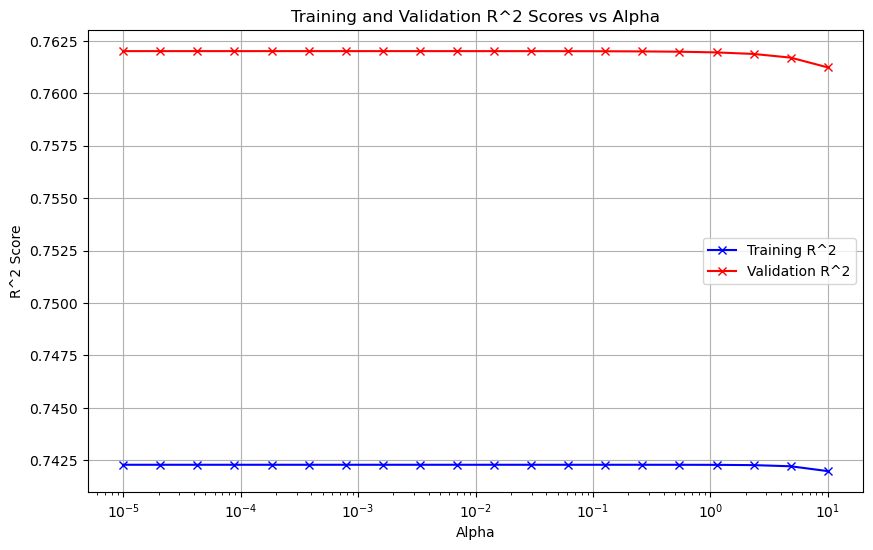

In [153]:

alphas = np.logspace(-5, 1, 20) 
train_r2_scores = []
val_r2_scores = []

for alpha in alphas:
    model = LinearRegression(alpha=alpha)
    
    model.train(insurance_X_train, insurance_y_train)
    
    y_train_pred = model.predict(insurance_X_train)
    y_val_pred = model.predict(insurance_X_val)
    
    train_r2 = r2_score(insurance_y_train, y_train_pred)
    val_r2 = r2_score(insurance_y_val, y_val_pred)
    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label= 'Training R^2', marker='x', color='blue')
plt.plot(alphas, val_r2_scores, label='Validation R^2', marker='x', color='red')
plt.xscale('log') 
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.title('Training and Validation R^2 Scores vs Alpha')
plt.legend()
plt.grid(True)
plt.show()

**2.1.13 Explain your plot above. How do training and validation $R^2$ behave with increasing $\alpha$?**

In this plot, the validation $R^2$ consistently exceeds the training $R^2$. Both $R^2$ values remain relatively constant as aloha incresaes This may show that the model performs better on the validation set than on the training data.  


### 2.2 Logistic Regression

**2.2.1 Load the dataset, the dataset to be used is loan_data.csv**

In [161]:
loan_df = pd.read_csv('loan_data.csv')
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [564]:
loan_df = loan_df.drop(columns=['Loan_ID'])

**2.2.2 Are there any missing values in the dataset? If so, what is the best way to deal with it and why?**

In [163]:
loan_df['LoanAmount'] = loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median())
loan_df['Self_Employed'] = loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0])
loan_df['Gender'] = loan_df['Gender'].fillna(loan_df['Gender'].mode()[0])
loan_df['Married'] = loan_df['Married'].fillna(loan_df['Married'].mode()[0])
loan_df['Dependents'] = loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0])
loan_df['Credit_History'] = loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0])
loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0])

In [165]:
missing_values = loan_df.isnull().sum()
print(missing_values)
loan_df

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


There is a significant amount of missing values in the dataset, more than 20% of the total data. Getting rid of this data will affect the dataset significantly. The best approach is to keep the data and replace the missing values using modes for categorical variables and medians for numerical ones.

**2.2.3 Encode the categorical variables.**

In [172]:

one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False) 
encoded_nominal = pd.DataFrame(one_hot_encoder.fit_transform(loan_df[['Gender', 'Married', 'Self_Employed', 'Property_Area']]), 
                               columns=one_hot_encoder.get_feature_names_out())

ordinal_encoder = OrdinalEncoder()
encoded_ordinal = pd.DataFrame(ordinal_encoder.fit_transform(loan_df[['Education', 'Dependents']]), 
                               columns=['Education', 'Dependents'])


loan_df_encoded = pd.concat([encoded_nominal, encoded_ordinal], axis=1)
loan_df_encoded['Loan_Status'] = loan_df['Loan_Status'].map({'Y': 1, 'N': 0})

loan_df_encoded.head()


,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Education,Dependents,Loan_Status
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1


**2.2.4 Do you think that the distribution of labels is balanced? Why/why not? Hint: Find the probability of the different categories.**

In [174]:

loan_status_dis = loan_df_encoded['Loan_Status'].value_counts(normalize=True)
print(loan_status_dis)


Loan_Status
1    0.687296
0    0.312704
Name: proportion, dtype: float64


The label distribution in this dataset is imbalanced. The probability of Loan_Status = 1  is approximately 69%, while the probability of Loan_Status = 0 is about 31%. This difference could lead to biased model predictions favoring the majority.

**2.2.5 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

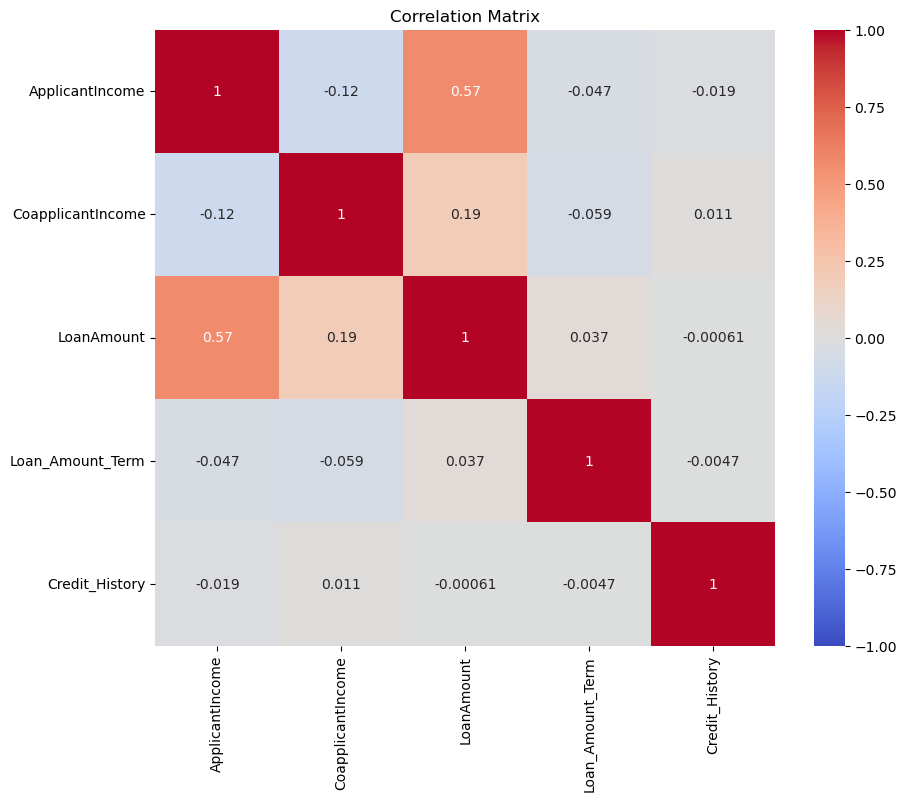

In [180]:
loan_df_num = loan_df.select_dtypes(include=[np.number])

correlation_matrix = loan_df_num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


**2.2.6 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [243]:
#1
y = loan_df_encoded['Loan_Status'].values.reshape(-1, 1)
X = loan_df_encoded.drop(columns=['Loan_Status']).values 

#2
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  

#3
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#4
X_train_final = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled)) 
X_val_final = np.hstack((np.ones((X_val_scaled.shape[0], 1)), X_val_scaled)) 
X_test_final = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))  
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_val_final shape: {X_val_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")




X_train_final shape: (368, 8)
X_val_final shape: (123, 8)
X_test_final shape: (123, 8)
y_train shape: (368, 1)
y_val shape: (123, 1)
y_test shape: (123, 1)


### Implement Logisitc Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
>
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [257]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''

        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
    
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold
        the predicted probability to return a 0 or 1 prediction.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w,
        and alpha. Useful as a helper function for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2

    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss
        using X, y, w, and alpha. Useful as a helper function
        for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w


    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x.
        Useful as a helper function for predict(), calculate_loss(),
        and calculate_gradient().

        Parameters
        ----------
        x: (m x 1) vector

        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.7 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

i) Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the loan training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.

ii) Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

iii) Compare accuracy on the test dataset for both the scenarios.

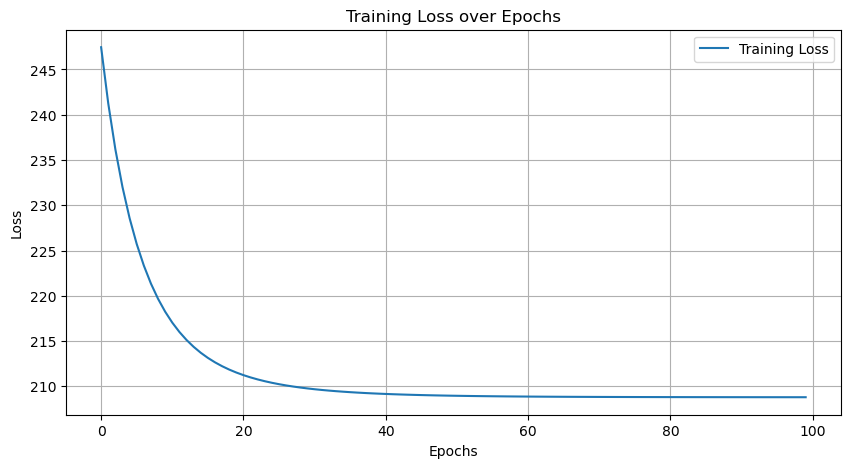

Training Accuracy: 0.7092391304347826
Validation Accuracy: 0.6016260162601627
Test Accuracy: 0.7073170731707317


In [255]:
#i)
log_reg_model = LogisticRegression(alpha=0, t=100, eta=1e-3)
losses = log_reg_model.train(X_train_final, Y_train)
losses = np.array(losses).reshape(-1)
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


In [262]:
import random

alpha_range = (0, 1)
eta_range = (0, 0.001)
t_range = (1, 100)

best_params = None
best_accuracy = 0

for i in range(20):  # Random search 20 times
    alpha = random.uniform(*alpha_range)
    eta = random.uniform(*eta_range)
    t = random.randint(*t_range)

    #Train with randomly selected hyperparameters
    model = LogisticRegression(alpha=alpha, t=t, eta=eta)
    model.train(X_train, y_train)

    #Evaluation
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)

    #Updating best parameters if current accuracy is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'alpha': alpha, 'eta': eta, 't': t}

print("Best Hyperparameters:", best_params)
print("Best Validation Accuracy:", best_accuracy)

Best Hyperparameters: {'alpha': 0.14345387426332157, 'eta': 0.0007785427594498108, 't': 87}
Best Validation Accuracy: 0.6097560975609756


In [264]:
#initial parameters
model_initial = LogisticRegression(alpha=0, t=100, eta=1e-3)
model_initial.train(X_train, y_train)
y_test_pred_initial = model_initial.predict(X_test)
test_accuracy_initial = accuracy_score(y_test, y_test_pred_initial)

#best hyperparameters
model_best = LogisticRegression(alpha=best_params['alpha'], t=best_params['t'], eta=best_params['eta'])
model_best.train(X_train, y_train)
y_test_pred_best = model_best.predict(X_test)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)

print("Test Accuracy (Initial Parameters):", test_accuracy_initial)
print("Test Accuracy (Best Hyperparameters):", test_accuracy_best)


Test Accuracy (Initial Parameters): 0.6991869918699187
Test Accuracy (Best Hyperparameters): 0.7073170731707317


The model with the best hyperparameters performed better than the default model. This indicates that the random search for better hyperparameters successfully enhanced the model's performance, even though it is a small improvement.

### Feature Importance

**2.2.8 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

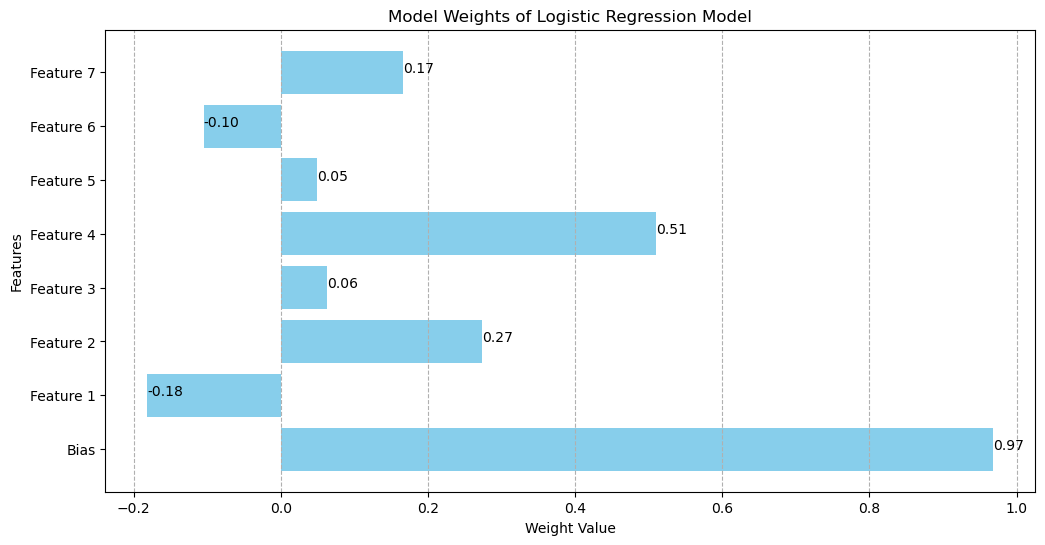

In [233]:
weights = log_reg_model.w.flatten() 
feature_names = ['Bias'] + ['Feature ' + str(i) for i in range(1, X_train_final.shape[1])]  # Replace with your actual feature names if available

plt.figure(figsize=(12, 6))
plt.barh(feature_names, weights, color='skyblue')
plt.title('Model Weights of Logistic Regression Model')
plt.xlabel('Weight Value')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--')
for index, value in enumerate(weights):
    plt.text(value, index, f"{value:.2f}")

plt.show()

Bar plot modeling weights of logistic regression model


### 2.3 Support Vector Machines

In this part, we will be using support vector machines for classification on the loan dataset.

### Train Primal SVM
**2.3.1 Train a primal SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [290]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

y_train_pred_linear = svm_linear.predict(X_train_scaled)
y_val_pred_linear = svm_linear.predict(X_val_scaled)
y_test_pred_linear = svm_linear.predict(X_test_scaled)

train_accuracy_linear = accuracy_score(y_train, y_train_pred_linear)
val_accuracy_linear = accuracy_score(y_val, y_val_pred_linear)
test_accuracy_linear = accuracy_score(y_test, y_test_pred_linear)

print("Linear Kernel SVM - Training Accuracy:", train_accuracy_linear)
print("Linear Kernel SVM - Validation Accuracy:", val_accuracy_linear)
print("Linear Kernel SVM - Test Accuracy:", test_accuracy_linear)


Linear Kernel SVM - Training Accuracy: 0.7092391304347826
Linear Kernel SVM - Validation Accuracy: 0.6016260162601627
Linear Kernel SVM - Test Accuracy: 0.7073170731707317


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Train Dual SVM
**2.3.2 Train a dual SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [303]:

svm_rbf = SVC(kernel='rbf', C=1.0, random_state=2)
svm_rbf.fit(X_train_scaled, y_train)

y_train_pred_rbf = svm_rbf.predict(X_train_scaled)
y_val_pred_rbf = svm_rbf.predict(X_val_scaled)
y_test_pred_rbf = svm_rbf.predict(X_test_scaled)

train_accuracy_rbf = accuracy_score(y_train, y_train_pred_rbf)
val_accuracy_rbf = accuracy_score(y_val, y_val_pred_rbf)
test_accuracy_rbf = accuracy_score(y_test, y_test_pred_rbf)

print("RBF Kernel SVM - Training Accuracy:", train_accuracy_rbf)
print("RBF Kernel SVM - Validation Accuracy:", val_accuracy_rbf)
print("RBF Kernel SVM - Test Accuracy:", test_accuracy_rbf)


RBF Kernel SVM - Training Accuracy: 0.7092391304347826
RBF Kernel SVM - Validation Accuracy: 0.6016260162601627
RBF Kernel SVM - Test Accuracy: 0.7073170731707317


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
